# Visualizing mbuild Compound

In this example, we will use `fresnel` to visualize an mbuild Compound. We will color the particles by types, as well as visualize the simulation box.

In [1]:
from PySide2 import QtCore
%gui qt

In [ ]:
import fresnel
import fresnel.interact
import numpy as np
import mbuild as mb
import freud

In [2]:
def mb_to_freud_box(box):
    """  
    Convert an mbuild box object to a freud box object

    Parameters
    ----------
    box : mbuild.box.Box()

    Returns
    -------
    freud.box.Box()
    """
    Lx = box.lengths[0]
    Ly = box.lengths[1]
    Lz = box.lengths[2]
    alpha = box.angles[0]
    beta = box.angles[1]
    gamma = box.angles[2]

    xy = np.cos(np.radians(gamma))
    yz = np.cos(np.radians(alpha))
    xz = np.cos(np.radians(beta))
    box_list = list(box.maxs) + [xy, yz, xz]
    return freud.box.Box(*box_list)

class Methane(mb.Compound):
    def __init__(self):
        super(Methane, self).__init__()
        carbon = mb.Particle(name='C')
        self.add(carbon, label='C[$]')

        hydrogen = mb.Particle(name='H', pos=[0.1, 0, -0.07])
        self.add(hydrogen, label='HC[$]')
        
        self.add_bond((self[0], self['HC'][0]))

        self.add(mb.Particle(name='H', pos=[-0.1, 0, -0.07]), label='HC[$]')
        self.add(mb.Particle(name='H', pos=[0, 0.1, 0.07]), label='HC[$]')
        self.add(mb.Particle(name='H', pos=[0, -0.1, 0.07]), label='HC[$]')

        self.add_bond((self[0], self['HC'][1]))
        self.add_bond((self[0], self['HC'][2]))
        self.add_bond((self[0], self['HC'][3]))

methane = Methane()
#methane.visualize().show()

box = mb.Box(lengths=[0.5,0.5,0.5])

In [3]:
cpk_colors = np.array(
    [
        [1.00, 1.00, 1.00], # white
        [0.30, 0.30, 0.30], # grey
        [0.13, 0.20, 1.00], # dark blue
        [1.00, 0.13, 0.00], # red
        [0.12, 0.94, 0.12], # green
        [0.60, 0.13, 0.00], # dark red
        [0.40, 0.00, 0.73], # dark violet
        [0.00, 1.00, 1.00], # cyan
        [1.00, 0.60, 0.00], # orange
        [1.00, 0.90, 0.13], # yellow
        [1.00, 0.67, 0.47], # peach
        [0.47, 0.00, 1.00], # violet
        [0.00, 0.47, 0.00], # dark green
        [0.60, 0.60, 0.60], # grey
        [0.87, 0.47, 0.00], # dark orange
        [0.87, 0.47, 1.00]  # pink
    ]
)


In [4]:
N = methane.n_particles
particle_names = [p.name for p in methane.particles()]

color_dict = {
    "H": fresnel.color.linear(cpk_colors[0]),
    "C": fresnel.color.linear(cpk_colors[1]),
    "N": fresnel.color.linear(cpk_colors[2]),
    "O": fresnel.color.linear(cpk_colors[3]),
    "F": fresnel.color.linear(cpk_colors[4]),
    "Cl": fresnel.color.linear(cpk_colors[4]),
    "Br": fresnel.color.linear(cpk_colors[5]),
    "I": fresnel.color.linear(cpk_colors[6]),
    "He": fresnel.color.linear(cpk_colors[7]),
    "Ne": fresnel.color.linear(cpk_colors[7]),
    "Ar": fresnel.color.linear(cpk_colors[7]),
    "Xe": fresnel.color.linear(cpk_colors[7]),
    "Kr": fresnel.color.linear(cpk_colors[7]),
    "P": fresnel.color.linear(cpk_colors[8]),
    "S": fresnel.color.linear(cpk_colors[9]),
    "B": fresnel.color.linear(cpk_colors[10]),
    "Li": fresnel.color.linear(cpk_colors[11]),
    "Na": fresnel.color.linear(cpk_colors[11]),
    "K": fresnel.color.linear(cpk_colors[11]),
    "Rb": fresnel.color.linear(cpk_colors[11]),
    "Cs": fresnel.color.linear(cpk_colors[11]),
    "Fr": fresnel.color.linear(cpk_colors[11]),
    "Be": fresnel.color.linear(cpk_colors[12]),
    "Mg": fresnel.color.linear(cpk_colors[12]),
    "Ca": fresnel.color.linear(cpk_colors[12]),
    "Sr": fresnel.color.linear(cpk_colors[12]),
    "Ba": fresnel.color.linear(cpk_colors[12]),
    "Ra": fresnel.color.linear(cpk_colors[12]),
    "Ti": fresnel.color.linear(cpk_colors[13]),
    "Fe": fresnel.color.linear(cpk_colors[14]),
}

# Made space to add more later
radii_dict = {
    "H": 0.05,
    "default": 0.06
}


# all_bonds.shape is (nbond, 2 ends, xyz)
all_bonds = np.stack([np.stack((i[0].pos, i[1].pos)) for i in methane.bonds()])


N_bonds = all_bonds.shape[0]

freud_box = mb_to_freud_box(box)

# Make an array of the colors based on particle name 
# -- if name is not defined in the dictionary, use pink
color_array = np.empty((N,3), dtype="float64")
for i,n in enumerate(particle_names):
    try:
        color_array[i,:] = color_dict[n]
    except KeyError:
        color_array[i,:] = fresnel.color.linear(cpk_color[-1])

# Make an array of the radii based on particle name 
# -- if name is not defined in the dictionary, use default
rad_array = np.empty((N), dtype="float64")
for i,n in enumerate(particle_names):
    try:
        rad_array[i] = radii_dict[n]
    except KeyError:
        rad_array[i] = radii_dict["default"]

In [5]:
scene = fresnel.Scene()

# Spheres for every particle in the system
geometry = fresnel.geometry.Sphere(scene, N=N, radius=0.06)
geometry.position[:] = methane.xyz
geometry.material = fresnel.material.Material(roughness=1.0)
geometry.outline_width = 0.01

# use color instead of material.color
geometry.material.primitive_color_mix = 1.0
geometry.color[:] = color_array

# resize radii
geometry.radius[:] = rad_array

# bonds
bonds = fresnel.geometry.Cylinder(scene, N=N_bonds)
bonds.material = fresnel.material.Material(roughness=0.5)
bonds.outline_width = 0.01

# bonds are white
bond_colors = np.ones((N_bonds, 3), dtype="float64")

bonds.material.primitive_color_mix = 1.0
bonds.points[:] = all_bonds

bonds.color[:] = np.stack(
    [fresnel.color.linear(bond_colors), fresnel.color.linear(bond_colors)], 
    axis=1
)
bonds.radius[:] = [0.03] * N_bonds


# create box in fresnel
fresnel.geometry.Box(scene, freud_box, box_radius=0.008);

In [ ]:
from PySide2 import QtCore
%gui qt

import fresnel.interact

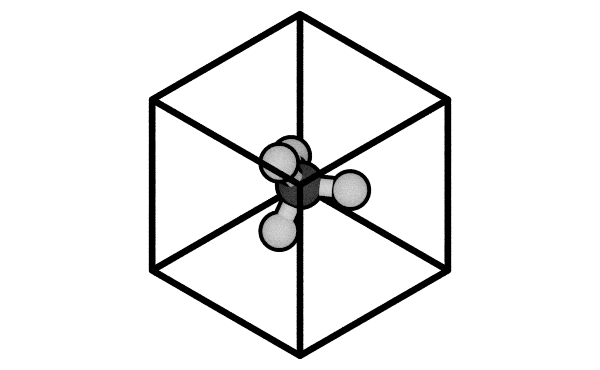

In [13]:
scene.lights = fresnel.light.ring()
fresnel.pathtrace(scene, light_samples=10)

In [3]:
# This cell wall used to generate the dictionary :)
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) 
                 for i in range(0, lv, lv // 3))

file = "CPK-colors"

with open(file) as f:
    lines = f.readlines()

for hex_color in lines:
    r = hex_to_rgb(hex_color.strip("\n"))[0]/255
    g = hex_to_rgb(hex_color.strip("\n"))[1]/255
    b = hex_to_rgb(hex_color.strip("\n"))[2]/255
    #print(f"[{r:.2f}, {g:.2f}, {b:.2f}],")
    
file = "cpk-names"
with open(file) as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    names = line.split()
    for name in names:
        #print(f'"{name}" : fresnel.color.linear(cpk_colors[{i}]),')
        pass